# Sales Prediction Using Python

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df=pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


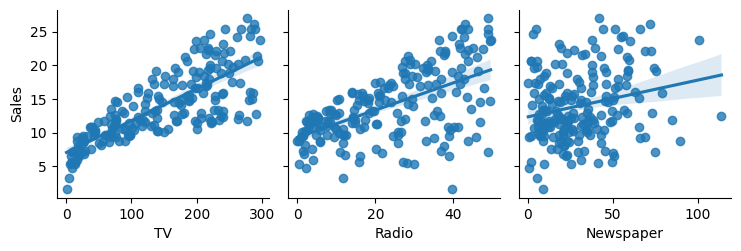

In [13]:
# check linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

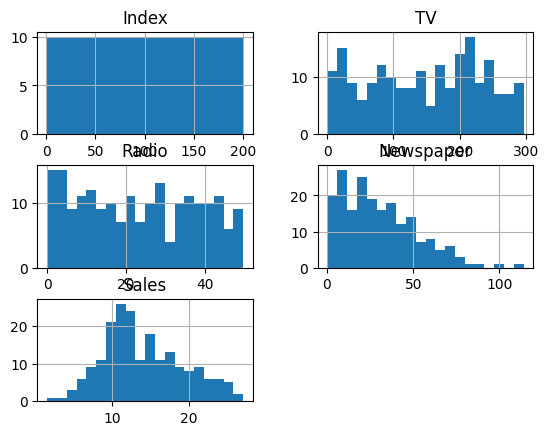

In [14]:
# check normality of dependent variable
df.hist(bins=20)

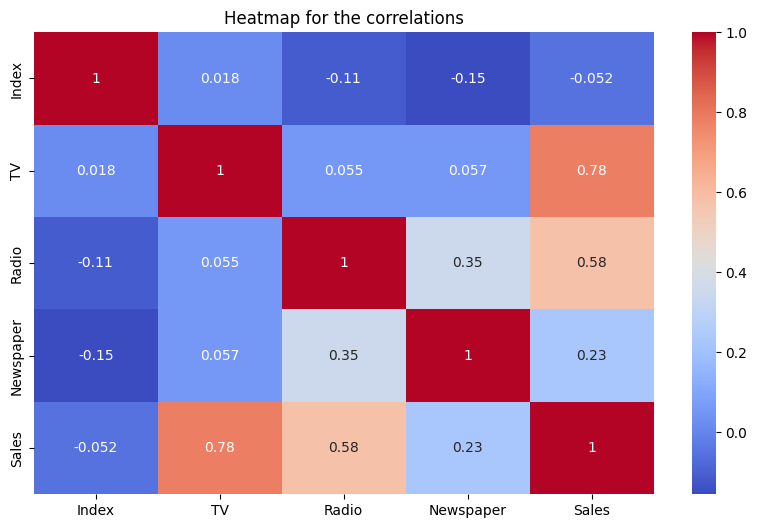

In [20]:
# correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title("Heatmap for the correlations")
plt.show()

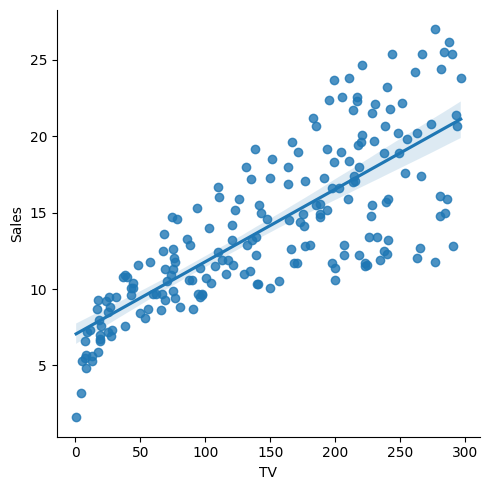

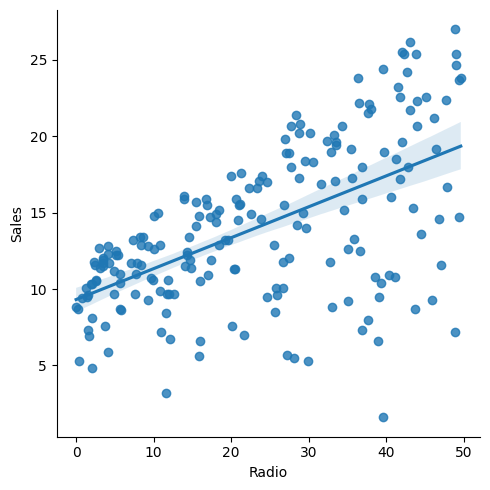

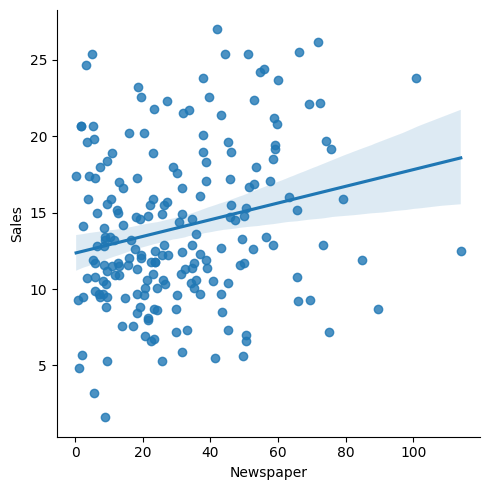

In [21]:
# relationship between each independent and each dependent variable
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

In [26]:
# model preparation
X = df.drop('Sales', axis=1)
y = df[["Sales"]]

# label encoding
le = LabelEncoder()
y= le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

C:\Users\Swati\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model= LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
y_predictions=model.predict(X_test_scaled)
y_predictions

array([ 63.56938813,  67.32131242,  54.11774458,  30.05040143,
       116.47506438,  30.71848689,  45.89049588,  32.96479763,
        59.39878177,  63.19914762,  42.89733061, 102.16287155,
        -6.08437085,  82.47472721,  69.46844147,  28.88367401,
        32.48525962,  36.24939701,   7.95528778,  72.76267676,
        32.66601999,  72.07489325,  -1.78875269,  76.03573048,
        24.29592973,  78.857705  ,  64.19269607,  47.79870916,
        59.64376836,  99.61569955,  21.48607059,  71.78072127,
        83.17478868,  57.17269269,  81.61620005,  62.61529134,
        58.60458005,  77.99864487,  14.8971142 ,  49.747287  ])

In [40]:
print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 7.4500670415300645
RMSE: 10.221867275369835
R-Squared 0.8618079270458497
